<Figure size 1000x800 with 0 Axes>

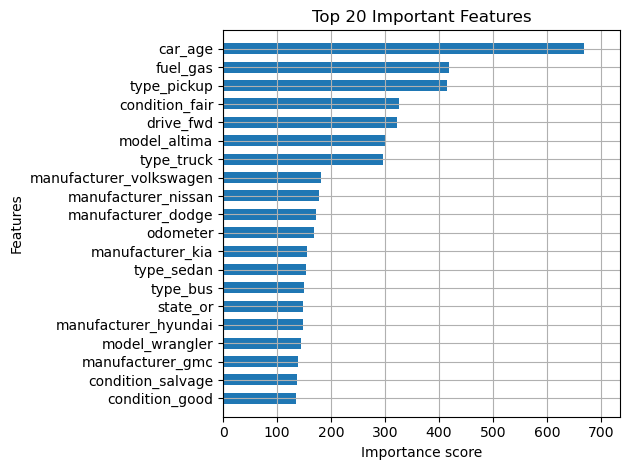

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Load and preprocess
df = pd.read_csv("vehicles.csv")
df = df[(df["price"] >= 100) & (df["price"] <= 100000)]
df["car_age"] = 2025 - df["year"]
df = df.drop(columns=["year"], errors="ignore")
top_models = df["model"].value_counts().nlargest(20).index
df["model"] = df["model"].where(df["model"].isin(top_models), other="other")
cat_cols = ["manufacturer", "condition", "fuel", "title_status", "transmission", "drive", "type", "state", "model"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df = df.drop(columns=df.select_dtypes(include="object").columns, errors="ignore")
df = df.fillna(0)
df["mileage_per_year"] = df["odometer"] / df["car_age"].replace(0, 1)
df["is_old_car"] = (df["car_age"] > 10).astype(int)
df["is_high_mileage"] = (df["odometer"] > 150000).astype(int)

# Target and train
y = df["price"]
X = df.drop(columns=["price"])
y_log = np.log1p(y)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)
model.fit(X_train, y_train_log)

# Feature importance plot
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20, height=0.6, importance_type='gain', show_values=False)
plt.title("Top 20 Important Features")
plt.tight_layout()
plt.show()
